## Content

1. Intro

2. About Dataset

3. Load DataSet

4. PreProcess

    4.1. reomve null value

    4.2. convert `Area` column to numeric

    4.3. readable `Price` column

    4.4. Fix Address

5. EDA

    5.1. shape of data

    5.2. columns

    5.3. info columns

    5.4. describe columns

    5.5. see null data for each columns

    5.6. Does every house with any number of rooms have a parking space or not?

    5.7. The percentage of houses with a square footage of less than 85

    5.8. distribution `Parking` , `Warehouse` and `Elevator`

    5.9. Mean of price House's Tehran


# Intro
In this notebook, we present a comprehensive analysis of the characteristics of houses in Tehran. Using machine learning models, we endeavor to predict house prices based on features such as area, number of rooms, and more.


To contact me: :‌‌ parvvaresh@gmail.com

# About Dataset

Dataset is crawled from Divar.ir

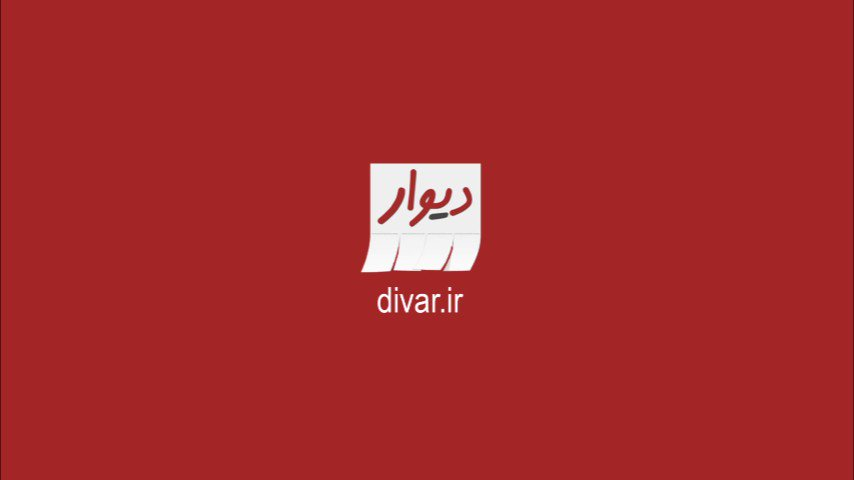

In [47]:
#import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import output
import re




#import regression models
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV



import torch
import torch.nn as nn
import torch.optim as optim



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#conect to google drive
from google.colab import drive
drive.mount('/content/drive')



import joblib

#for ignore warning python
import warnings
warnings.filterwarnings("ignore")

output.clear()

# Load Dataset and see it

In [74]:
df = pd.read_csv("/content/drive/MyDrive/Tehran price house/housePrice.csv")
df.head(7)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00


# Pre Process

1. reomve null value

2. convert `Area` column to numeric

3. readable `Price` column

3. Fix Address

## 1. remove null value

In [49]:
df.dropna(inplace=True)

## 2. convert `Area` column to numeric

In [76]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

## 3. readable `Price` column


In [78]:
df.loc[:, "Price2"] =df["Price"].map('{:,.0f}'.format)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Price2
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,"1,850,000,000"
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,"1,850,000,000"
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,"550,000,000"
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,"902,500,000"
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,"7,000,000,000"
...,...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,"3,500,000,000"
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67,"6,800,000,000"
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67,"365,000,000"
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67,"5,600,000,000"


## 4. Fix Address



In Iran, after the revolution, the West neighborhood was renamed to Quds neighborhood, and people use both names

These two names should be the same. We use the name of the western settlement for its original name

In [51]:
df["Address"] = df["Addreess"].replace()

# EDA

* shape of data

* columns

* info columns

* describe columns

* see null data for each columns

* Does every house with any number of rooms have a parking space or not?

* The percentage of houses with a square footage of less than 85

* distribution `Parking` , `Warehouse` and `Elevator`

* Mean of price House's Tehran

## shape of data

see number of columns and rows in data

In [52]:
f"number of row : {df.shape[0]} and number of columns : {df.shape[1]}"

'number of row : 3456 and number of columns : 8'

## columns


see the name of columns

In [53]:
for column in df.columns:
  print(f"---> {column}")

---> Area
---> Room
---> Parking
---> Warehouse
---> Elevator
---> Address
---> Price
---> Price(USD)


## info columns


summary of the DataFrame, including information about the index, column data types, non-null values, and memory usage.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


## describe data

In [55]:
df.describe()

,Area,Room,Price(USD)
count,3.456000e+03,3456.000000,3.456000e+03
mean,8.802191e+06,2.081308,1.793319e+05
std,3.177783e+08,0.759723,2.707243e+05
min,3.000000e+01,0.000000,1.200000e+02
25%,6.900000e+01,2.000000,4.733333e+04
50%,9.000000e+01,2.000000,9.666667e+04
75%,1.210000e+02,2.000000,2.000000e+05
max,1.616000e+10,5.000000,3.080000e+06


## see null data for each columns

In [56]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

## Does every house with any number of rooms have a parking space or not?


If you pay attention, houses with 2 rooms are the most number of houses with parking

In [59]:
pd.crosstab(df.Parking , df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


## The percentage of houses with a square footage of less than 85

In [62]:
(len(df[df.Area <= 85.0]) / len(df)) * 100

44.039351851851855

## distribution `Parking` , `Warehouse` and `Elevator`




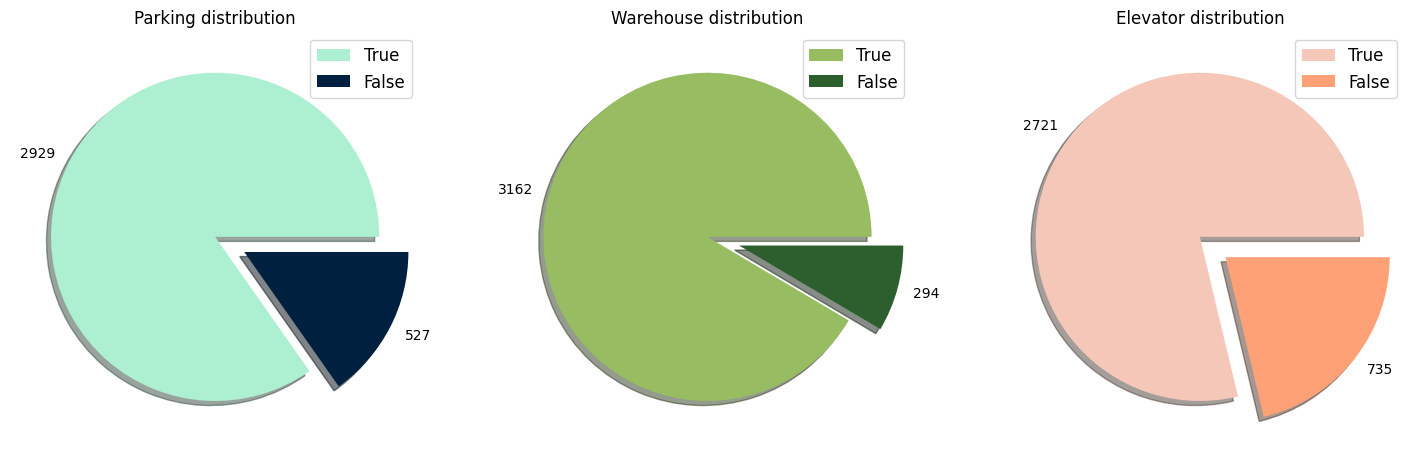

In [70]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

## Mean of price House's Tehran :  `5,359.022,711`

In [82]:
df["Price"].mean().round()

5359022711.0

## describe plot of Price

<Figure size 800x500 with 0 Axes>

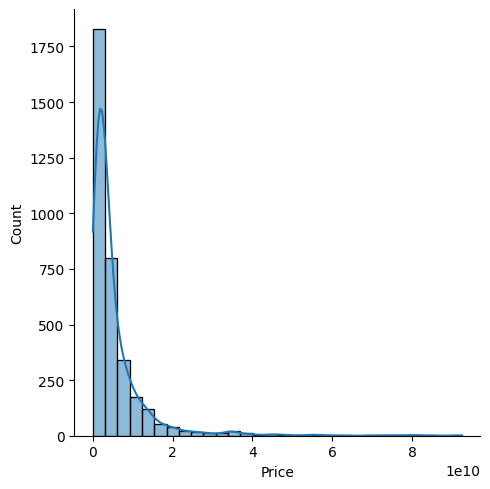

In [83]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )

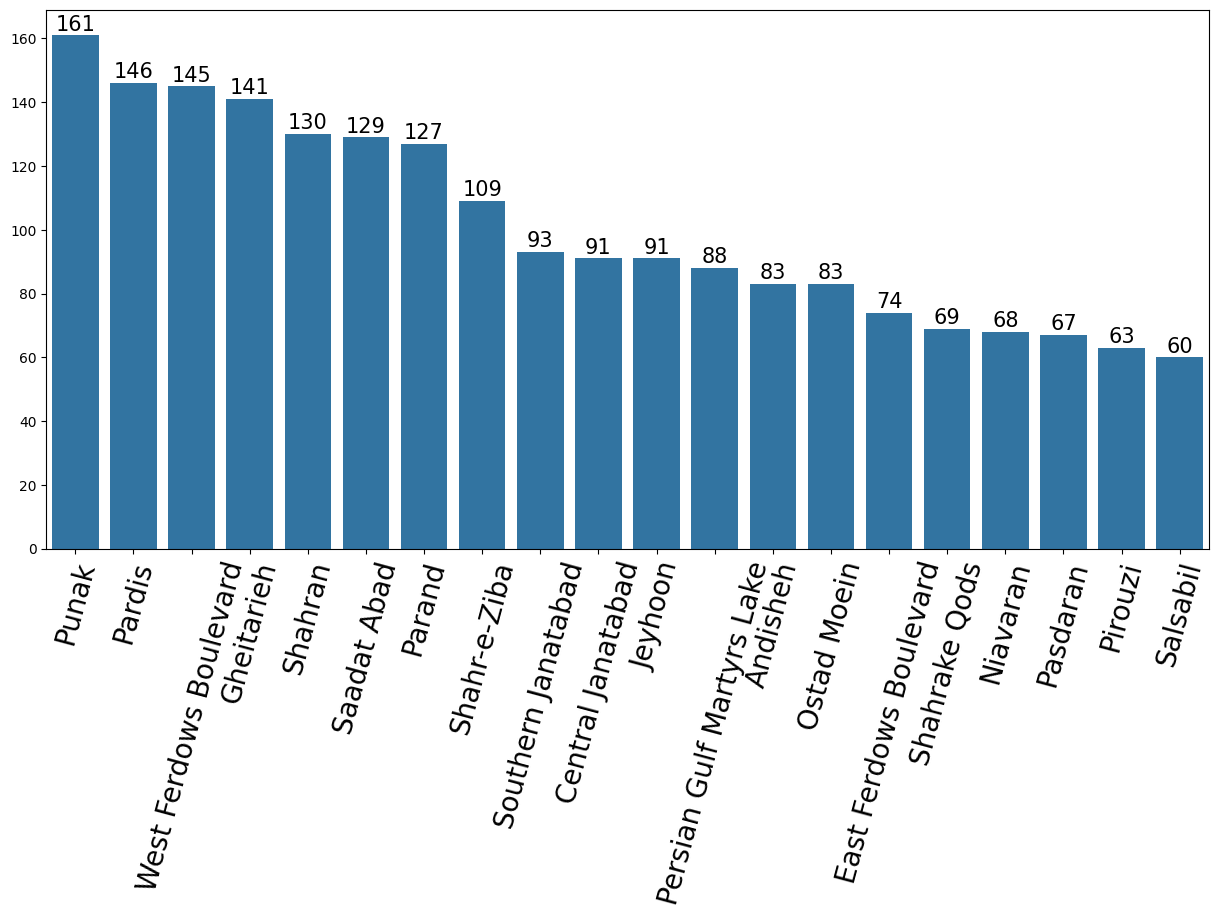

In [106]:
most_loc = pd.DataFrame(df["Address"].value_counts()[:20])


plt.figure(figsize = (15 , 7))
plots = sns.barplot(x = list(most_loc.index) , y = list(map(lambda x : int(x),list(most_loc.values))))
plots.set_xticklabels(plots.get_xticklabels(),rotation = 75)
plots.xaxis.set_tick_params(labelsize=20)

for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


In [126]:
expensive_areas = pd.DataFrame(df.groupby(by="Address")["Price"].mean().sort_values(ascending=False).head(25))
expensive_areas

,Price
Address,
Gandhi,7.000000e+10
Lavasan,4.800000e+10
Mahmoudieh,3.346667e+10
Vanak,3.270000e+10
Elahieh,2.678635e+10
Argentina,2.516500e+10
Zaferanieh,2.357515e+10
Velenjak,2.138136e+10
Farmanieh,2.091728e+10


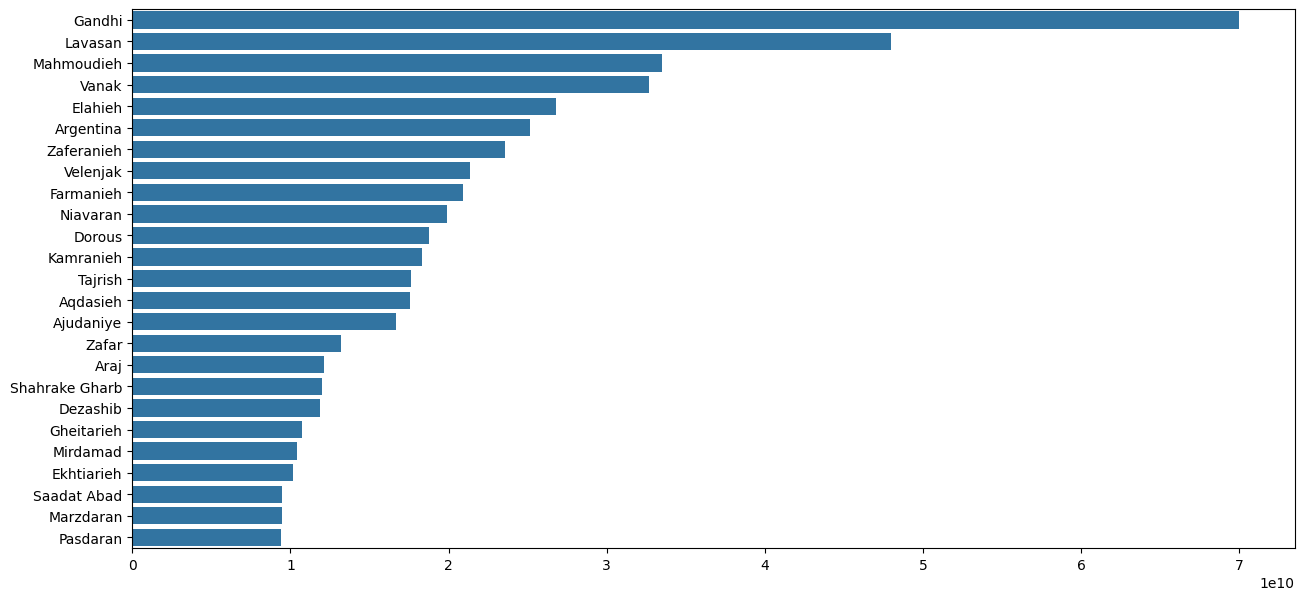

In [127]:
plt.figure(figsize = (15 , 7))
plots = sns.barplot(y = list(expensive_areas.index) , x = list(map(lambda x : int(x),list(expensive_areas.values))))

In [140]:
mean_per_room = {}
for number_room in df["Room"].unique():
  mean_price = df[df["Room"] == number_room]["Price"].mean()
  mean_per_room.update({number_room : '{:,.0f}'.format(mean_price)})

mean_per_room = pd.DataFrame(mean_per_room.items(), columns = ["Number of Rooms", "Mean of Price"])
mean_per_room

,Number of Rooms,Mean of Price
0,1,"1,703,751,412"
1,2,"3,322,727,083"
2,3,"10,925,798,497"
3,0,"7,860,500,000"
4,4,"25,600,328,571"
5,5,"33,734,393,939"
